In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


dataset_id = "MSV000086809" # Indicate Dataset Here
#Datasets: PXD027742, MSV000086004, MSV000086809, PXD016057MS3

filepath = dataset_id + "/psm.TSV"
info_path = dataset_id + "/sdrf.xlsx"

psm_df = pd.read_csv(filepath, delimiter = "\t")
sdrf_df = pd.read_excel(info_path)

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.99]

psm_df["File_Name"] = psm_df["Spectrum File"].str.extract(r"^(?:.+\\)*interact-(.+)\.pep\.xml$")
sdrf_df["File_Name"] = sdrf_df["file name"].str.extract(r"^(?:.+\\)*(.+)\.raw$")

datasets = psm_df["File_Name"].unique()


psm_df = psm_df.rename(columns={'sample-01': '126', 'sample-02': '127C', 'sample-03': '127N', 'sample-04': '128C', 'sample-05': '128N',
                               'sample-06': '129C', 'sample-07': '129N', 'sample-08': '130C', 'sample-09': '130N', 'sample-10': '131C', 'sample-11': '131N',
                               'sample-12': '132C', 'sample-13': '132N', 'sample-14': '133C', 'sample-15': '133N', 'sample-16': '134N'})

psm_df = psm_df.loc[psm_df["PeptideProphet Probability"] > 0.95]


psm_df['Boost_Spillover'] = psm_df['127C']/psm_df['126']


psm_df[["Boost_Spillover"]].describe()



psm_df["Boost_logged"] = psm_df["126"].apply(np.log10) # In the future, log the axis rather than the actual data



In [2]:
graphdf = psm_df[['126', 'Boost_Spillover', 'Boost_logged']]
graphdf

,126,Boost_Spillover,Boost_logged
0,0.0000,NaN,-inf
2,2986.6787,0.000000,3.475189
3,0.0000,NaN,-inf
4,527.5941,0.000000,2.722300
6,0.0000,NaN,-inf
...,...,...,...
7492,7397.9673,0.150771,3.869112
7493,1365.8990,0.000000,3.135419
7494,0.0000,NaN,-inf
7495,1330.4694,0.000000,3.124005


In [3]:
#need to justify the spillover somehow
import numpy as np
data = graphdf['126']
# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Calculate number 2 standard deviations away from the mean
number_3std_away_carrier = mean + (3 * std_dev)

print("Number 3 standard deviations away from the mean (carrier):", number_3std_away_carrier)


Number 3 standard deviations away from the mean (carrier): 1093156.6802915349


In [4]:
#need to justify the spillover somehow
import numpy as np
data = graphdf['Boost_Spillover'] 
# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Calculate number 2 standard deviations away from the mean
number_3std_away_spillover = mean + (3 * std_dev)

print("Number 3 standard deviations away from the mean (spillover):", number_3std_away_spillover)

Number 3 standard deviations away from the mean (spillover): 0.11415122164243988


In [5]:
graphdf = psm_df[['126', 'Boost_Spillover', 'Boost_logged']]
#drop rows where the abundances of all samples was 0. 
graphdf = graphdf[graphdf['126'] != 0]
graphdf = graphdf[graphdf['126'] <= number_3std_away_carrier]#remove outlier that's ruining everything
graphdf = graphdf[graphdf['Boost_Spillover'] <= number_3std_away_spillover]
graphdf.head()

,126,Boost_Spillover,Boost_logged
2,2986.6787,0.0,3.475189
4,527.5941,0.0,2.722300
16,4678.1660,0.0,3.670076
21,3499.7266,0.0,3.544034
28,2861.6770,0.0,3.456621


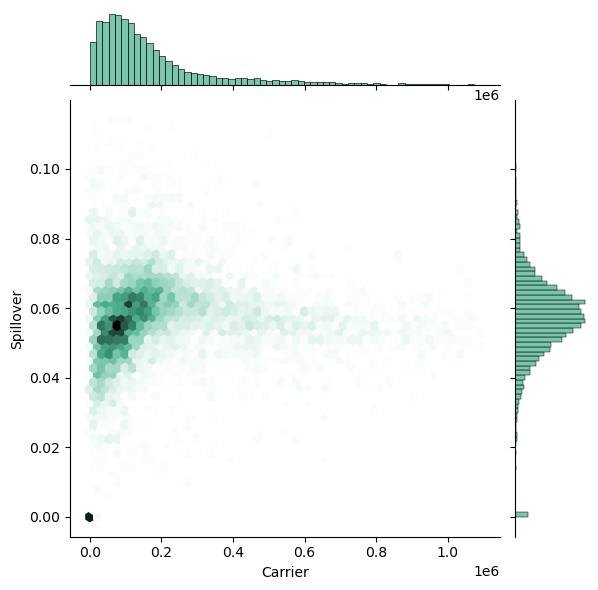

In [6]:
sns.jointplot(x=graphdf['126'], y=graphdf['Boost_Spillover'], kind="hex", color="#4CB391")
plt.ylabel("Spillover")
plt.xlabel("Carrier")
# plt.show()
plt.savefig('figure4.png')